## MATH285 Lab Code
**Group Name:** MATH285gg  

**Group Member and student ID:**  
Jun Liang     3210112584  
Yujie Pan     3210112494  
Xinchen Yin   3210112483  
Ziming Yan    3210111502  
Xingjian Kang 3210110763  

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

import sympy as sp

In [2]:
def func(t, y):
    return (y - t ** 2) * (y ** 2 - t)
    # return y             # for test
    # return math.cos(t)   # for test

In [3]:
class NumericalSols:
    def __init__(self, y_0, step, lower_bound, upper_bound, method_num):
        self.t_0 = 0
        self.y_0 = y_0
        assert(lower_bound <= 0 and upper_bound >= 0)
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.step = step
        self.t_all = []
        self.y_all = []
        self.method_num = method_num
        if method_num == 0:
            self.eulerMethod()
        elif method_num == 1:
            self.impEuler()
        elif method_num == 2:
            self.runge4thMethod()
        elif method_num == 3:
            self.ABM()
        elif method_num == 4:
            self.MS()
        elif method_num == 5:
            self.Hamming()        
        elif method_num == 6:
            self.powerSeries()
        else:
            raise NotImplementedError

    # method_num: 0
    def eulerMethod(self):
        # less than 0
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n = y_n + func(t_n, y_n) * (-self.step)
            t_n = t_n + (-self.step)
        
        # larger than 0   
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n = y_n + func(t_n, y_n) * self.step
            t_n = t_n + self.step

    # 1
    def impEuler(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n_euler = y_n + func(t_n, y_n) * (-self.step)    # improved from Euler Method
            y_n = y_n + 0.5 * (-self.step) * (func(t_n, y_n) + func(t_n + (-self.step), y_n_euler))
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n_euler = y_n + func(t_n, y_n) * self.step    # improved from Euler Method
            y_n = y_n + 0.5 * self.step * (func(t_n, y_n) + func(t_n + self.step, y_n_euler))
            t_n = t_n + self.step
    
    # 2
    def runge4thMethod(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n - (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
    
    ### method 3, 4, 5 are linear multiple step methods, and the code below just implemented the case with t>=0
    # 3
    def ABM(self):
        y_n = self.y_0
        t_n = self.t_0
        i=0
        while i<4:
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
            i=i+1
        k=3
        while t_n <= self.upper_bound:
            t_0=self.t_all[k-3]
            t_1=self.t_all[k-2]
            t_2=self.t_all[k-1]
            t_3=self.t_all[k]
            y_0=self.y_all[k-3]
            y_1=self.y_all[k-2]
            y_2=self.y_all[k-1]
            y_3=self.y_all[k]
            dy=y_3+(self.step/24)*(-9*func(t_0,y_0)+37*func(t_1,y_1)-59*func(t_2,y_2)+55*func(t_3,y_3))
            t_n=t_3+self.step
            y_n=y_3+(self.step/24)*(func(t_1,y_1)-5*func(t_2,y_2)+19*func(t_3,y_3)+9*func(t_n,dy))
            if(abs(y_n)>5): break
            self.t_all.append(t_n)
            self.y_all.append(y_n)
            k=k+1
            
    # 4
    def MS(self):
        y_n = self.y_0
        t_n = self.t_0
        i=0     
        while i<4:
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
            i=i+1
        k=3
        while (t_n <= self.upper_bound):
            t_0=self.t_all[k-3]
            t_1=self.t_all[k-2]
            t_2=self.t_all[k-1]
            t_3=self.t_all[k]
            y_0=self.y_all[k-3]
            y_1=self.y_all[k-2]
            y_2=self.y_all[k-1]
            y_3=self.y_all[k]
            dy=y_0+4*(self.step/3)*(2*func(t_1,y_1)-func(t_2,y_2)+2*func(t_3,y_3))
            t_n=t_3+self.step
            y_n=y_2+(self.step/3)*(func(t_2,y_2)+4*func(t_3,y_3)+func(t_n,dy))
            if(abs(y_n)>5): break
            self.t_all.append(t_n)
            self.y_all.append(y_n)
            k=k+1
            
    # 5
    def Hamming(self):
        y_n = self.y_0
        t_n = self.t_0
        i=0     
        while i<4:
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
            i=i+1
        k=3
        while (t_n <= self.upper_bound):
            t_0=self.t_all[k-3]
            t_1=self.t_all[k-2]
            t_2=self.t_all[k-1]
            t_3=self.t_all[k]
            y_0=self.y_all[k-3]
            y_1=self.y_all[k-2]
            y_2=self.y_all[k-1]
            y_3=self.y_all[k]
            dy=y_0+4*(self.step/3)*(2*func(t_1,y_1)-func(t_2,y_2)+2*func(t_3,y_3))
            t_n=t_3+self.step
            y_n=-y_1/8+9*y_3/8+3*(self.step/8)*(-func(t_2,y_2)+2*func(t_3,y_3)+func(t_n,dy))
            if(abs(y_n)>5): break
            self.t_all.append(t_n)
            self.y_all.append(y_n)
            k=k+1  
    
    # 6
    def powerSeries(self):
        # pass
        a = np.zeros(100, dtype=float)
        b = np.zeros(100, dtype=float)
        c = np.zeros(100, dtype=float)
        a[0] = self.y_0

        #self.help_bc(a, b, c, 0)
        a[1] = a[0] # c[0]

        self.help_bc(a, b, c, 1)
        a[2] = a[1] # a[2] = (c[1]-a[0])/2

        self.help_bc(a, b, c, 2)
        a[3] = (c[2]-b[0]-a[1])/3 

        self.help_bc(a, b, c, 3)
        a[4] = (c[3]-b[1]-a[2]+1)/4 
        for i in range(4,90):
            self.help_bc(a, b, c, i)
            a[i+1] = (c[i]-b[i-2]-a[i-1])/(i+1)

        for i in range(10):    
            print(i, "a=", a[i], "b=", b[i], "c=", c[i])

        self.help_PwrSrs(a, b, c, -1)
        self.help_PwrSrs(a, b, c, 1)
    
    def help_bc(self, a, b, c, i):
        for j in range(i+1):
            b[i] += a[j]*a[i-j]
        for j in range(i+1):
            c[i] += a[j]*b[i-j]

    def help_PwrSrs(self, a, b, c, dir):
        i = 1
        y_n = t_n = 0
        while (t_n>=self.lower_bound and t_n<=self.upper_bound):
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0

            if(dir==1):
                self.y_all.append(y_n)
                self.t_all.append(t_n)
            elif(dir==-1):
                self.y_all.insert(0, y_n)
                self.t_all.insert(0, t_n)
                
            y_n = 0
            for i in range(20):
                y_n += a[i] * (t_n ** i)
            if(abs(y_n)>5): break

            t_n = t_n + dir* self.step



    def draw(self):
        plt.xlabel('t', fontsize=19)
        plt.ylabel('y', fontsize=19)
        plt.plot(self.t_all, self.y_all, c="red")

    def drawlinear(self,n):
        plt.xlabel('t', fontsize=19)
        plt.ylabel('y', fontsize=19)
        if (n==3):
            plt.plot(self.t_all, self.y_all, c="red",label="ABM")
        if (n==4):
            plt.plot(self.t_all, self.y_all, c="blue", label="MS")
        if (n==5):
            plt.plot(self.t_all, self.y_all, c="green", label="Hamming")
        

In [4]:
def testDiffMethods(y_0, step, lower_bound, upper_bound):
    """
    Test different methods according to the given parameters by drawing plots.
    """
    # eulerMethod
    euler_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 0)
    plt.plot(euler_meth.t_all, euler_meth.y_all, c="green", label="Euler method")
    
    # impEuler
    im_eu_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 1)
    plt.plot(im_eu_meth.t_all, im_eu_meth.y_all, c="red", label="Improve Euler method")
    
    # runge4thMethod
    runge_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 2)
    plt.plot(runge_meth.t_all, runge_meth.y_all, c="blue", label="Runge 4th order")
    
    # ABM
    mulstep_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 3)
    plt.plot(mulstep_meth.t_all, mulstep_meth.y_all, c="brown", label="ABM")
    
    # MS
    mulstep_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 4)
    plt.plot(mulstep_meth.t_all, mulstep_meth.y_all, c="black", label="MS")

    # Hamming
    mulstep_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 5)
    plt.plot(mulstep_meth.t_all, mulstep_meth.y_all, c="purple", label="Hamming")

    
    # powerSeries method
    power_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 6)
    plt.plot(power_meth.t_all, power_meth.y_all, c="orange", label="Power series")
    

In [5]:
def testDiffSteps(y_0, lower_bound, upper_bound, method_num):
    """
    Test one method with different steps by drawing plots.
    """
    # step == 0.2
    meth1 = NumericalSols(y_0, 0.2, lower_bound, upper_bound, method_num)
    plt.plot(meth1.t_all, meth1.y_all, c="green", label="step=0.2")
    
    # step == 0.1
    meth2 = NumericalSols(y_0, 0.1, lower_bound, upper_bound, method_num)
    plt.plot(meth2.t_all, meth2.y_all, c="red", label="step=0.1")
    
    # step == 0.05
    meth3 = NumericalSols(y_0, 0.05, lower_bound, upper_bound, method_num)
    plt.plot(meth3.t_all, meth3.y_all, c="blue", label="step=0.05")
    

In [6]:
def plotDiffMethods(y_0, step, lower_bound, upper_bound):
    # fig=plt.figure(num=1,figsize=(8,6))
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    # ax1 = fig.add_subplot(311)
    # ax1.set_title("311")
    testDiffMethods(y_0, step, lower_bound, upper_bound)

    plt.legend()
    plt.show()

In [7]:
def plotDiffSteps(y_0, lower_bound, upper_bound, method_num):
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    testDiffSteps(y_0, lower_bound, upper_bound, method_num)

    plt.legend()
    plt.show()  
    pass

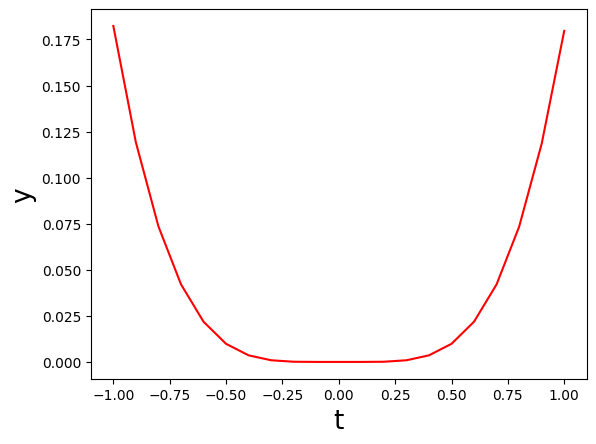

In [8]:
# Euler Method with step = 0.1, IVP1
euler_1 = NumericalSols(0, 0.1, -1, 1, 0)
euler_1.draw()

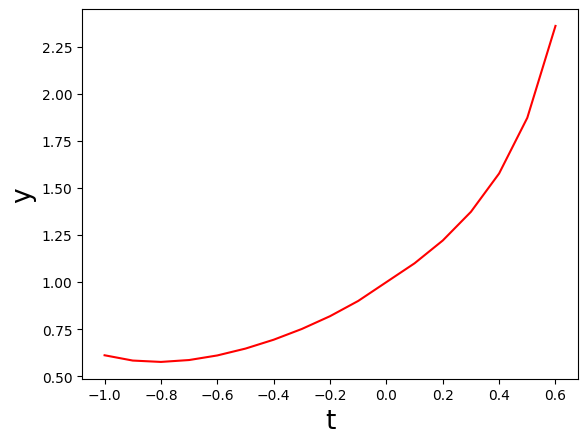

In [9]:
# Euler Method with step = 0.1, IVP2
euler_2 = NumericalSols(1, 0.1, -1, 0.6, 0)
euler_2.draw()

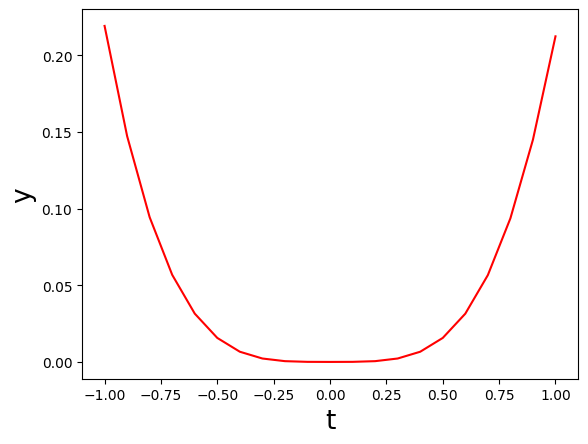

In [10]:
# improve Euler Method with step = 0.1, IVP1
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_1 = NumericalSols(0, 0.1, -1, 1, 1)
im_euler_1.draw()

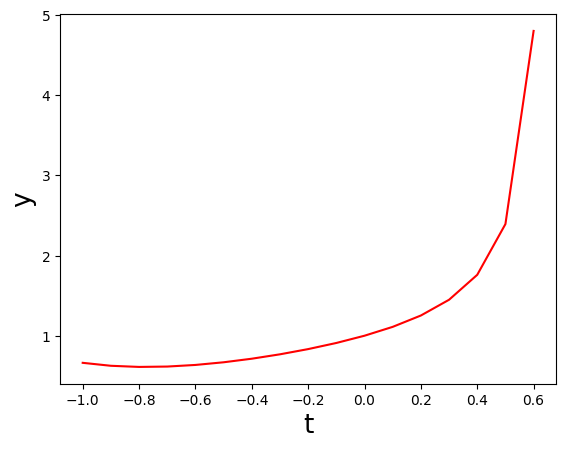

In [11]:
# improve Euler Method with step = 0.1, IVP2
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_2 = NumericalSols(1, 0.1, -1, 0.6, 1)
im_euler_2.draw()

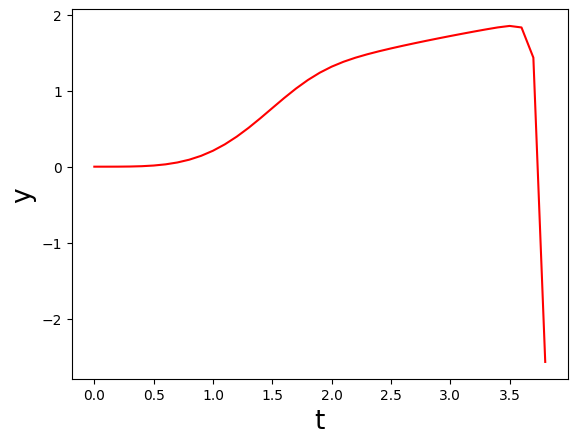

In [12]:
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
Runge = NumericalSols(0, 0.1, 0, 3.9, 2)
Runge.draw()

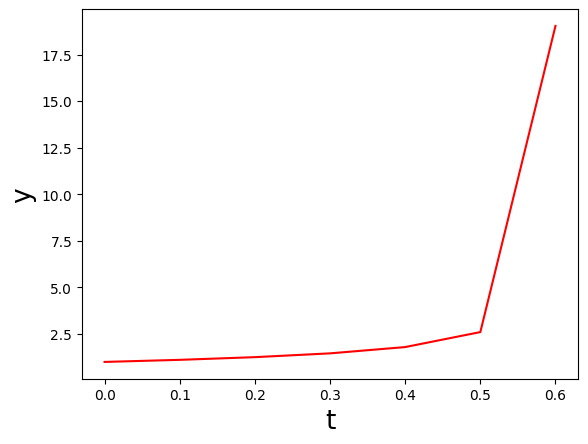

In [13]:
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
Runge = NumericalSols(1, 0.1, 0, 0.6, 2)
Runge.draw()


0 a= 0.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= 0.0 b= 0.0 c= 0.0
3 a= 0.0 b= 0.0 c= 0.0
4 a= 0.25 b= 0.0 c= 0.0
5 a= 0.0 b= 0.0 c= 0.0
6 a= -0.041666666666666664 b= 0.0 c= 0.0
7 a= 0.0 b= 0.0 c= 0.0
8 a= 0.005208333333333333 b= 0.0625 c= 0.0
9 a= 0.0 b= 0.0 c= 0.0


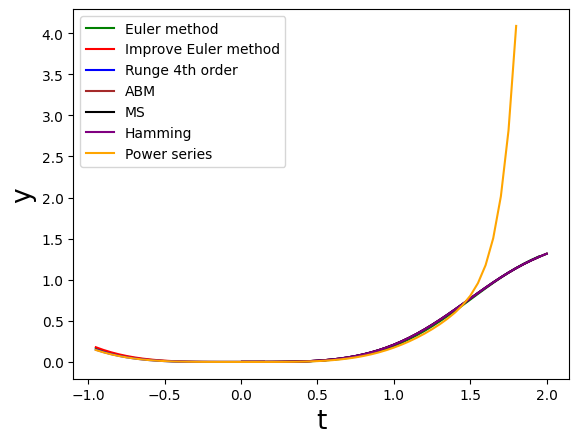

0 a= 0.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= 0.0 b= 0.0 c= 0.0
3 a= 0.0 b= 0.0 c= 0.0
4 a= 0.25 b= 0.0 c= 0.0
5 a= 0.0 b= 0.0 c= 0.0
6 a= -0.041666666666666664 b= 0.0 c= 0.0
7 a= 0.0 b= 0.0 c= 0.0
8 a= 0.005208333333333333 b= 0.0625 c= 0.0
9 a= 0.0 b= 0.0 c= 0.0


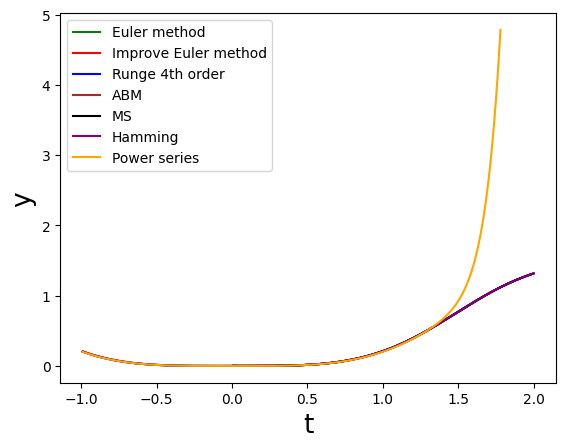

In [14]:
# IVP1, compare methods with different steps
l_bound = -1
r_bound = 2
# plotDiffMethods(0, 0.1, l_bound, r_bound)  # step == 0.1
plotDiffMethods(0, 0.05, l_bound, r_bound) # step == 0.05
plotDiffMethods(0, 0.01, l_bound, r_bound) # step == 0.01

0 a= 1.0 b= 0.0 c= 0.0
1 a= 1.0 b= 2.0 c= 2.0
2 a= 1.0 b= 3.0 c= 5.0
3 a= 1.3333333333333333 b= 4.666666666666666 c= 9.666666666666666
4 a= 1.9166666666666665 b= 7.5 c= 17.833333333333332
5 a= 2.6999999999999997 b= 11.899999999999999 c= 31.899999999999995
6 a= 4.219444444444443 b= 19.449999999999996 c= 56.222222222222214
7 a= 6.5746031746031734 b= 32.09920634920635 c= 98.93253968253967
8 a= 10.351636904761902 b= 53.16498015873015 c= 173.3633928571428
9 a= 16.370976631393294 b= 88.19628527336859 c= 302.56996252204584


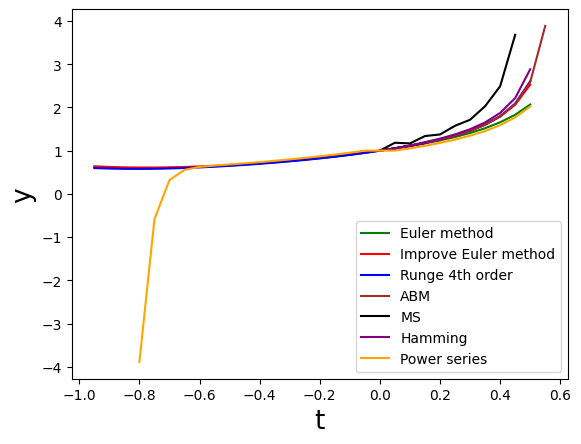

0 a= 1.0 b= 0.0 c= 0.0
1 a= 1.0 b= 2.0 c= 2.0
2 a= 1.0 b= 3.0 c= 5.0
3 a= 1.3333333333333333 b= 4.666666666666666 c= 9.666666666666666
4 a= 1.9166666666666665 b= 7.5 c= 17.833333333333332
5 a= 2.6999999999999997 b= 11.899999999999999 c= 31.899999999999995
6 a= 4.219444444444443 b= 19.449999999999996 c= 56.222222222222214
7 a= 6.5746031746031734 b= 32.09920634920635 c= 98.93253968253967
8 a= 10.351636904761902 b= 53.16498015873015 c= 173.3633928571428
9 a= 16.370976631393294 b= 88.19628527336859 c= 302.56996252204584


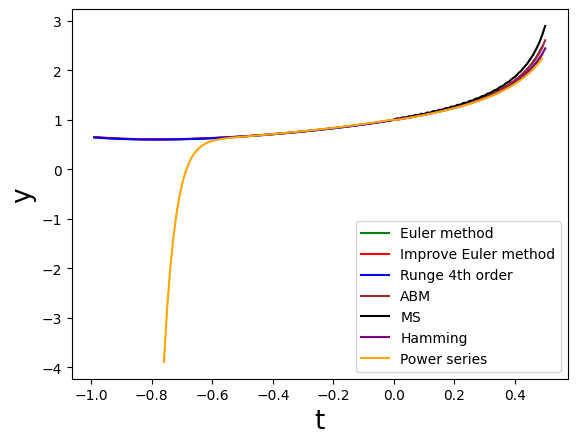

In [15]:
# IVP2, compare methods with different steps
l_bound = -1
r_bound = 0.5
# plotDiffMethods(1, 0.1, l_bound, r_bound)  # step == 0.1
plotDiffMethods(1, 0.05, l_bound, r_bound) # step == 0.05
plotDiffMethods(1, 0.01, l_bound, r_bound) # step == 0.01

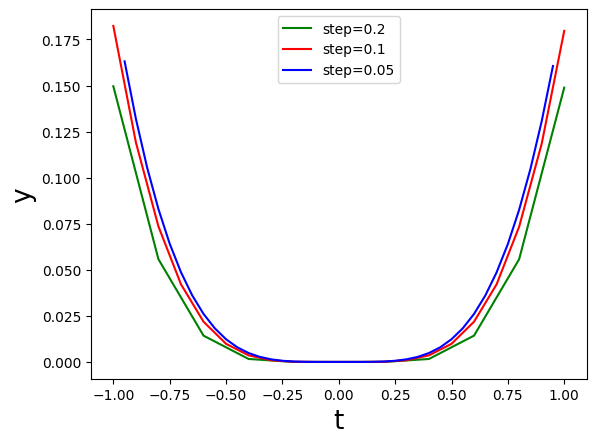

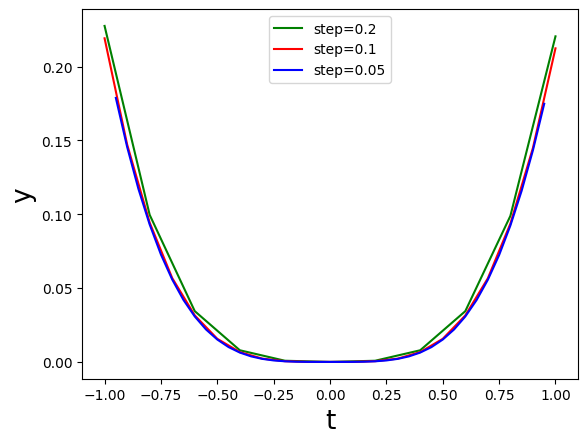

In [16]:
# IVP1, compare one method with different steps
plotDiffSteps(0, -1, 1, 0) # Euler
plotDiffSteps(0, -1, 1, 1) # improve Euler
                           # others

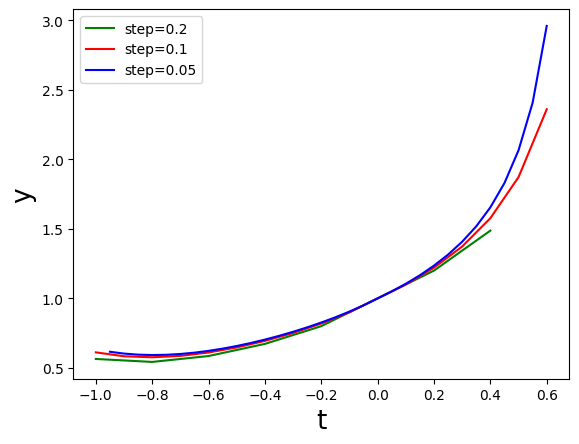

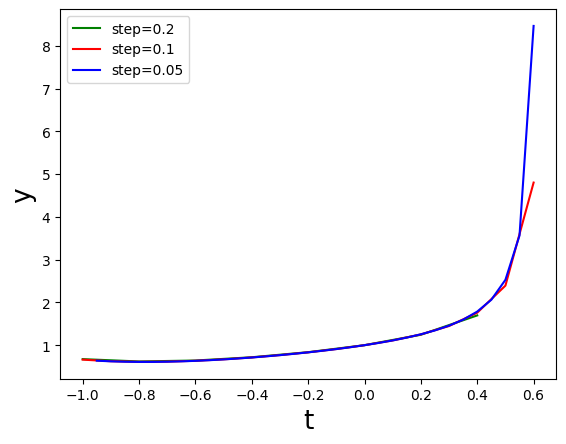

In [17]:
# IVP2, compare one method with different steps
plotDiffSteps(1, -1, 0.6, 0) # Euler
plotDiffSteps(1, -1, 0.6, 1) # improve Euler
                             # others